# Explore here

In [ ]:
# Your code here
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import *
from imblearn.metrics import specificity_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris


In [2]:
# Leemos el csv con el head para que nos devuelva las 5 primeras líneas de df
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Miramos el rango que tiene el df para valorar los siguientes pasos
df.shape

(768, 9)

In [4]:
# Buscamos si el df tiene valores duplicados, si es así los eliminamos
df = df.drop_duplicates().reset_index(drop = True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

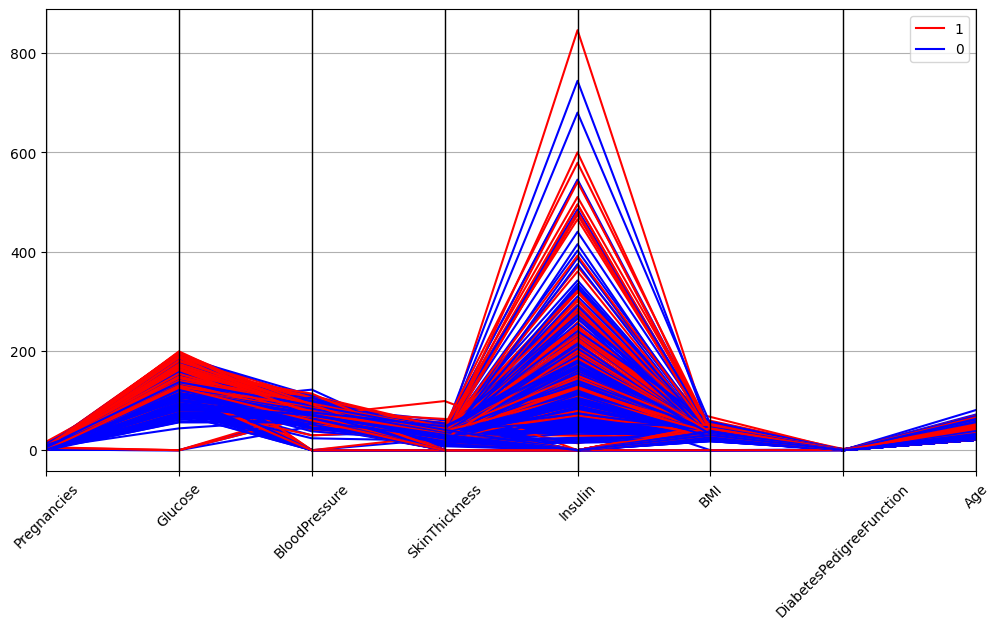

In [6]:
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(df, 'Outcome', color=['red', 'blue'])
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Con este gráfico podemos ver uqe la insulina aporta mayor importancia o mayor impacto en la clasificación, aún así las variables no estan escaldadas por lo tanto no podemos sacar ninguna conclusión

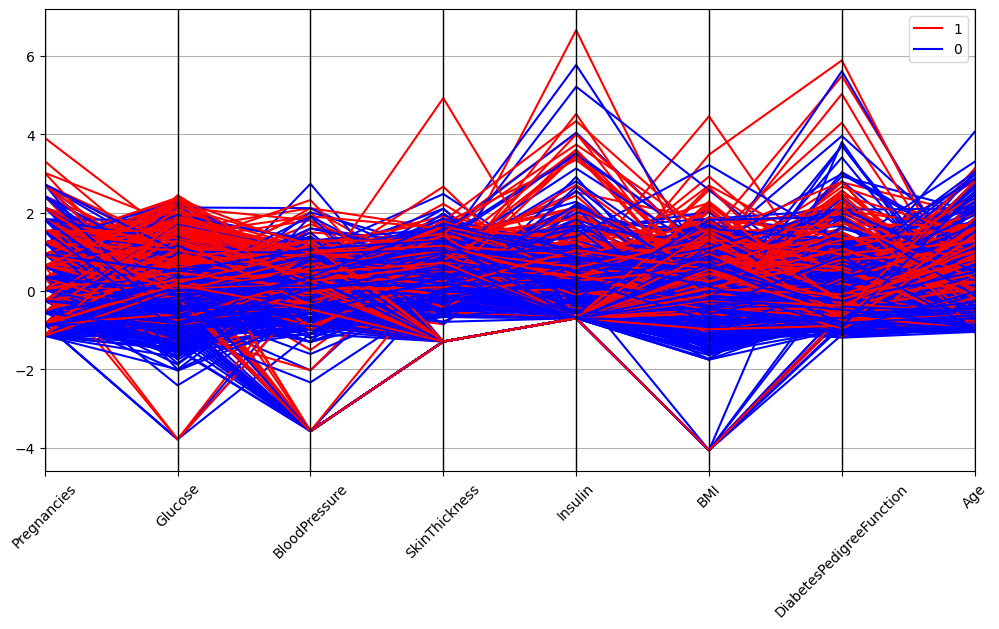

In [7]:
data_sc = pd.DataFrame(data=StandardScaler().fit_transform(df.drop(['Outcome'], axis=1)), columns=df.columns[:-1])
data_sc['Outcome'] = df.Outcome
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(data_sc, 'Outcome', color=['red', 'blue'])
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Con los valores de las columnas escaladas y vemos que resalatan mas caracteristicas importantes 

In [23]:
data_sc.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# Creamos el modelo de entrenamiento a partir de la columna Outcome
X = data_sc.drop('Outcome', axis=1)
y = data_sc['Outcome']
#X, y = load_iris(return_X_y = True, as_frame = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,-0.547919,-1.154694,-3.572597,-1.288212,-0.692891,-4.060474,-0.507006,-1.041549
618,1.530847,-0.278373,0.666618,0.217261,-0.692891,-0.481351,2.446670,1.425995
346,-0.844885,0.566649,-1.194501,-0.096379,0.027790,-0.417892,0.550035,-0.956462
294,-1.141852,1.255187,-0.987710,-1.288212,-0.692891,-1.280942,-0.658012,2.702312
231,0.639947,0.410164,0.563223,1.032726,2.519781,1.803195,-0.706334,1.085644


In [ ]:
#--------Apuntes----------#

# Arbol simple, donde maxfeatures cogemos la mitad de las caracteristicas para la partición del arbol, luego minsampleleaf es para que haya un mínimo de 20 pacientes
#simple_tree = DecisionTreeClassifier(max_depth=3,max_features=X_train.shape[1]//2,min_samples_leaf=20,random_state=42).fit(X_train, y_train)
#complex_tree = DecisionTreeClassifier(max_depth=100,min_samples_leaf=1,random_state=42).fit(X_train, y_train)
# se expande hasta que cada nodo hoja llega a representar 1 paciente (no es práctico, hay que generalizar grupos de pacientes)

# Aplicamos los árboles sobre los datos de entrenamiento y de test
#train_pred_complex = complex_tree.predict(X_train)
#test_pred_complex = complex_tree.predict(X_test)
#train_pred_simple = simple_tree.predict(X_train)
#test_pred_simple = simple_tree.predict(X_test)


In [ ]:
#--------Apuntes----------#
#escalamos los datos
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)


#Gini Impurity: Este es el criterio por defecto en el algoritmo CART (Classification and Regression Trees) y mide la impureza de un nodo basado en la probabilidad de una clasificación aleatoria incorrecta.

#Entropy (Información): Este criterio mide la cantidad de información y se basa en la teoría de la información. Se utiliza principalmente en algoritmos como ID3.

In [26]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3,random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

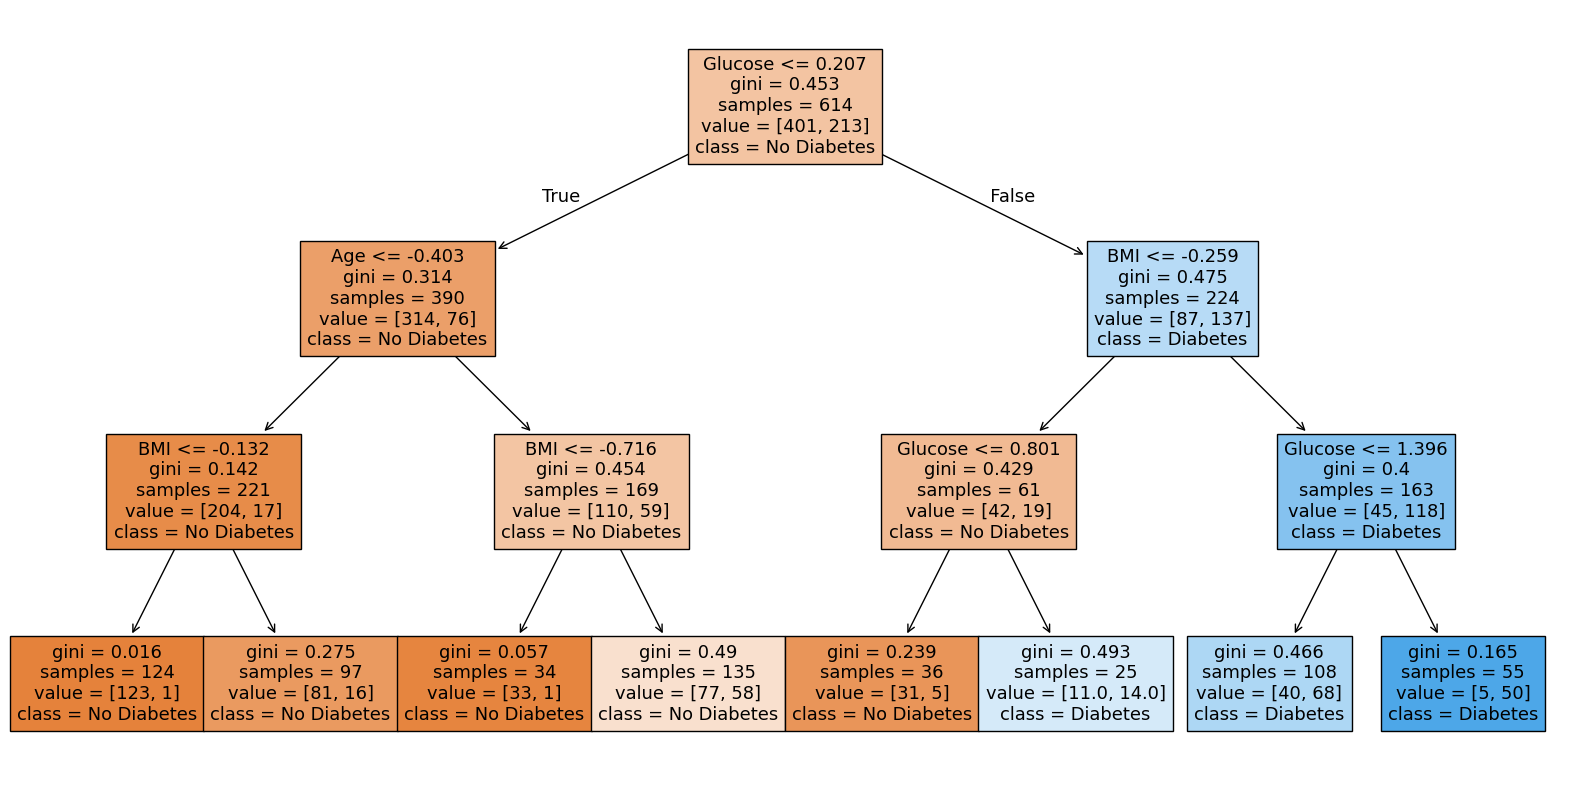

In [ ]:
#Ploteamos el arbol en función de No dibaetes vs Diabetes.

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"], filled=True)
plt.show()


In [ ]:
#nodos con gini mas bajo indican una clasificación muy segura.

In [ ]:
# Lo alto del árbol divide los datos en función del nivel de glucosa, la glucosa es el predictor más importante para determinar la presencia de diabetes.
#Si el nivel de glucosa es bajo (≤ 0.208), el árbol sigue analizando la edad y el IMC para confirmar si la persona tiene diabetes, pero la mayoría de los casos terminan clasificados como "No Diabetes"

# Para aquellos con niveles de glucosa bajos, el IMC y la edad ayudan a refinar la clasificación. Por ejemplo, personas más jóvenes y con un IMC más bajo tienen menos probabilidades de desarrollar diabetes.

In [75]:
#Este árbol de decisión sugiere que los niveles de glucosa son el factor más determinante en la predicción de diabetes, seguido por el IMC y la edad. 
#Individuos con glucosa baja generalmente no tienen diabetes, mientras que aquellos con glucosa alta tienen una mayor probabilidad, especialmente si su IMC también es alto.

In [28]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [30]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



In [ ]:
#El modelo tiene un rendimiento razonable en general, con una precisión y recall relativamente altos para la clase 0, pero un poco más bajo para la clase 1.
#Hay un equilibrio entre las métricas, aunque el modelo parece tener un mejor desempeño en la clase 0 que en la clase 1, lo cual es importante considerar según el contexto del problema.

In [31]:
# Paso 4: Optimización con GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}
grid_search = GridSearchCV(DecisionTreeClassifier(max_depth=4,random_state=42), param_grid, cv=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=DecisionTreeClassifier(max_depth=4, random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [32]:
best_model = grid_search.best_estimator_

In [33]:
y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



In [ ]:
# El uso de GridSearchCV ha llevado a mejoras generales en la precisión y el F1-score, especialmente en la clase 1, aunque los cambios son sutiles.
# El modelo sigue siendo más efectivo para la clase 0, y aunque la clase 1 ha mejorado, aún tiene margen para mejorar.

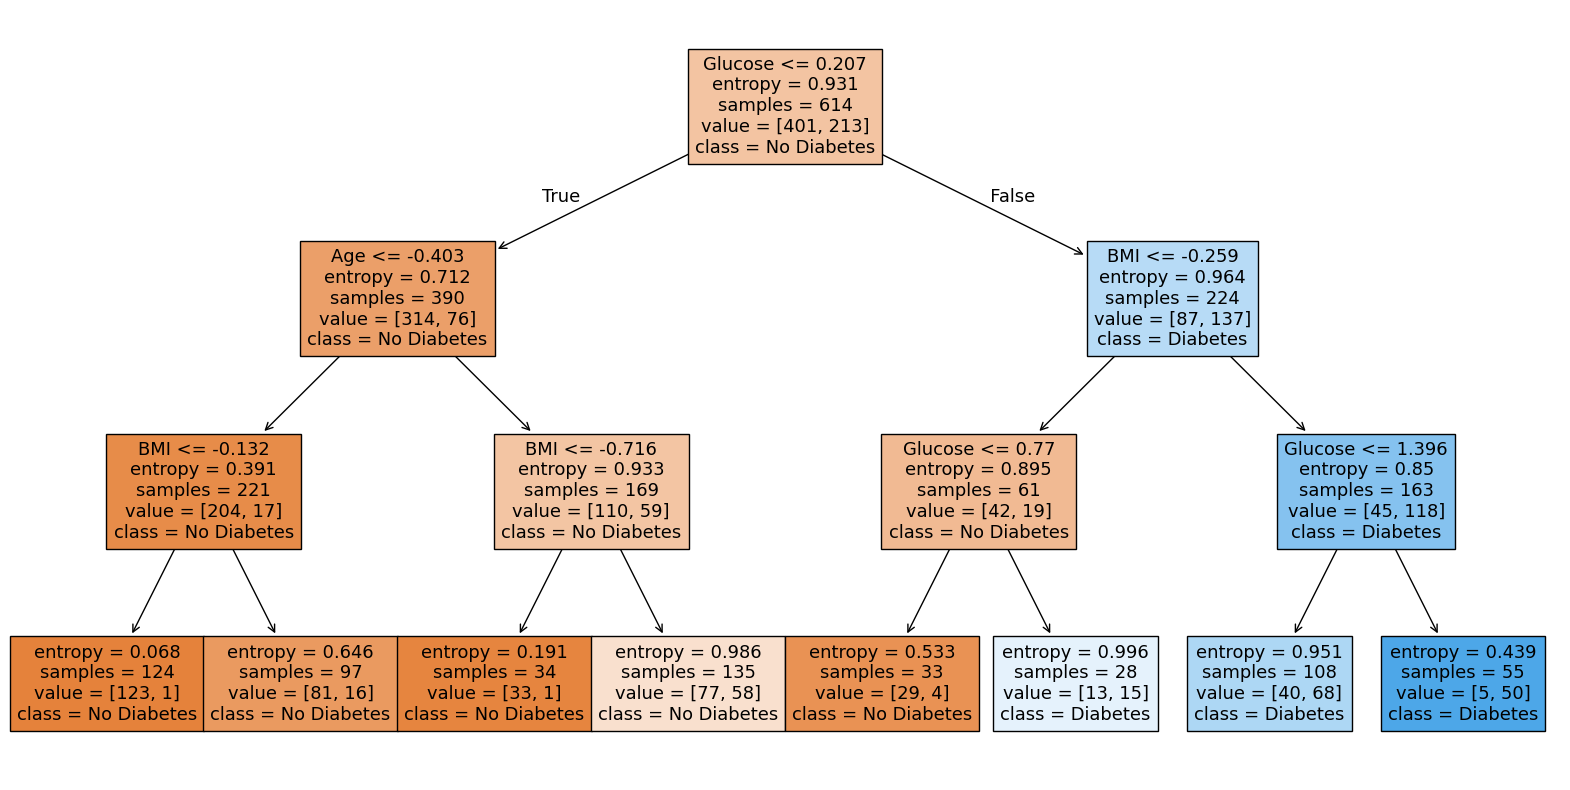

In [34]:
plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=X_train.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.show()

In [ ]:
# El árbol indica que la edad, los niveles de glucosa, el BMI y la insulina son factores clave para determinar el riesgo de diabetes. 
# Sin embargo, algunas divisiones tienen alta incertidumbre (gini alto), lo que sugiere que podrían necesitarse más datos o un modelo más complejo para mejorar la predicción.
# La primera división se hace en 28.5 años, lo que sugiere que la edad es un factor clave en la probabilidad de tener diabetes.
#Si la persona tiene más de 28.5 años, se analizan el IMC (BMI), glucosa e insulina.
#Para personas jóvenes (≤ 28.5 años), un nivel de glucosa ≤ 127.5 está más asociado a no diabetes, mientras que niveles mayores requieren más análisis.
#En personas mayores, la glucosa también se usa para dividir los casos, mostrando su importancia en la predicción.
#Para personas mayores de 28.5 años, un BMI ≤ 27.85 no es suficiente para predecir la diabetes por sí solo (gini = 0.5, indicando mucha incertidumbre).
#En casos con BMI alto, el nivel de insulina ≤ 142 ayuda a determinar la probabilidad de tener diabetes.

In [ ]:
#----------------------- LO QUE HAY A PARTIR DE AQUI SON NOTAS Y APUNTES PARA MI ----------------- #

In [ ]:
#Accuracy es acierto global. Usar solo si el dataframe esta balanceado
#Precision, es de todos los 
# Recall es la sensibilidad de todos los pacientes con Diabetes cuantos han sido detectados
#Precision de Output de las veces que el arbol dice 1 cuanto es realmente este valor.
#Especidifididad es de los 0 cuantos han sido identificados.
#fF1 cuanto mejor sea entonces es mejor es el balance entre Recall y Especifidad
# AUC es la probabilidad de que el algoritmo sea capaz de hacer una distinción entre las dos clases

In [80]:
get_metrics(y_train, y_test, train_pred_complex, test_pred_complex)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,1.000000,1.000000,1.000000,1.000,1.000000,1.000000
Test,0.746753,0.672269,0.742424,0.625,0.727273,0.757576
Diferencia,0.253247,0.327731,0.257576,0.375,0.272727,0.242424


In [ ]:
# para la compleja el train lo hace muy bien, porque no generaliza.

In [81]:
get_metrics(y_train, y_test, train_pred_simple, test_pred_simple)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.737785,0.663883,0.739823,0.597744,0.746479,0.733167
Test,0.636364,0.594203,0.660606,0.493976,0.745455,0.575758
Diferencia,0.101421,0.069680,0.079217,0.103768,0.001024,0.157410


In [ ]:
# 

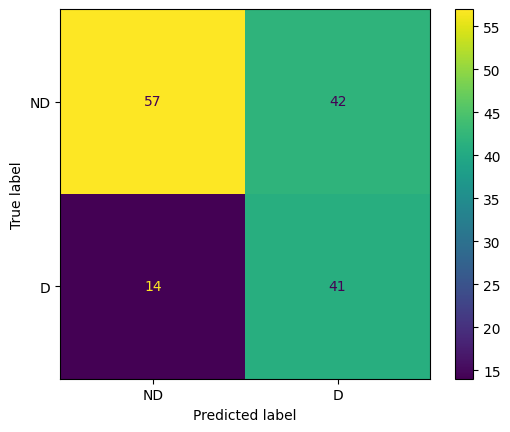

In [88]:
cm = confusion_matrix(y_test, test_pred_simple)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['ND', 'D'])
disp.plot()

In [ ]:
#Los aciertos son arrIzquierda(verdaderos negativos) y abjderecha (verdaderos positivos) arrderecha(falsos positivos) abjizqioerda(falso negativo)